In [1]:
#%matplotlib notebook
import numpy as np
import serial
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from time import sleep
import os
from glob import glob
import pandas as pd

In [41]:
ser = serial.Serial(port='COM4',baudrate=115200,timeout=.2)
print(ser.name)

COM4


In [4]:
def serialQry(port, command):
    port.reset_input_buffer()
    port.write((command + '\r').encode('ascii'))
    return port.readline().decode('ascii').strip() #strip removes white space

def serialCmd(port, command):
    port.reset_input_buffer()
    port.write((command + '\r').encode('ascii'))

In [42]:
serialQry(ser, '*IDN?')

'Stanford_Research_Systems,SR542,s/n00000001,v0.10'

In [6]:
def impulseMeasurement(totalTime, dt, IQ):
    speed = np.zeros(0)
    N = int(totalTime/dt)
    serialCmd(ser,f'$IMQ {IQ:.3f}')
    
    for t in range(0,N):
        speed = np.append(speed, float(serialQry(ser,'MFRQ? SHAFT')))        
        sleep(dt)
        
    time_s = np.arange(0, totalTime, dt)
    #np.savetxt('impulse_'+str(delta_IQ)+'.txt',np.transpose([time_s,speed]),newline='\r\n')
    serialCmd(ser, 'AMPL 0, 0')
    serialCmd(ser,'STOP')
    
    return time_s, speed

In [43]:
time_s, speed = impulseMeasurement(30, 0.1, 0.15)

<IPython.core.display.Javascript object>


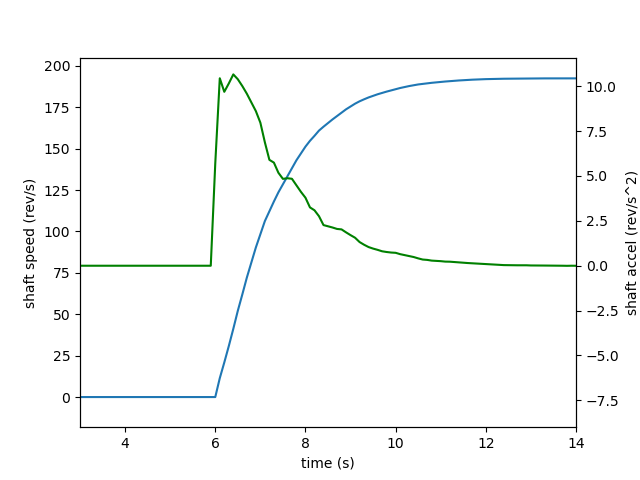

Text(0, 0.5, 'shaft accel (rev/s^2)')

In [44]:
fix, ax = plt.subplots()
ax.plot(time_s, speed)
ax.set_xlabel('time (s)')
ax.set_ylabel('shaft speed (rev/s)')

ax2 = ax.twinx()
ax2.set_xlim(3, 14)
ax2.plot(time_s, np.gradient(speed), color='green')
ax2.set_ylabel('shaft accel (rev/s^2)')

In [51]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(list(zip(time_s, speed)), columns=['time', 'speed'])
df

,time,speed
0,0.0,0.00
1,0.1,-8.06
2,0.2,-4.81
3,0.3,-1.29
4,0.4,2.51
5,0.5,-1.11
6,0.6,0.00
7,0.7,0.00
8,0.8,0.00
9,0.9,0.00


In [16]:
def impulseResponse(x, f_term, tau):
    return f_term*(1 - np.exp(-x/tau))

In [17]:
def secondOrderResponse(x, K, beta, alpha):
    return K*(1 - (beta*np.exp(-alpha*x) - alpha*np.exp(-beta*x))/(beta - alpha))

In [18]:
def cropArrays(time, speed):
    # find the last index of speed = 0 before the speed starts to increase
    greaterThanNegThres = np.asarray(speed > -0.01)
    LessThanPosThresh = np.asarray(speed < 0.01)
    
    speedIsZero = np.logical_and(greaterThanNegThres, LessThanPosThresh).nonzero()[0]
    index_t0 = speedIsZero[-1]
    
    time_subset = time[index_t0:] - time[index_t0]
    speed_subset = speed[index_t0:]
    
    return time_subset, speed_subset

In [52]:
t, s = cropArrays(time_s, speed)

<IPython.core.display.Javascript object>


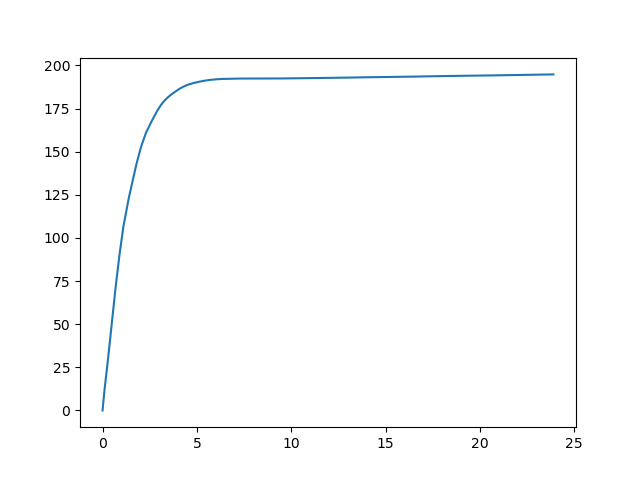

In [53]:
plt.plot(t, s)

In [54]:
max(s)

194.83

<IPython.core.display.Javascript object>


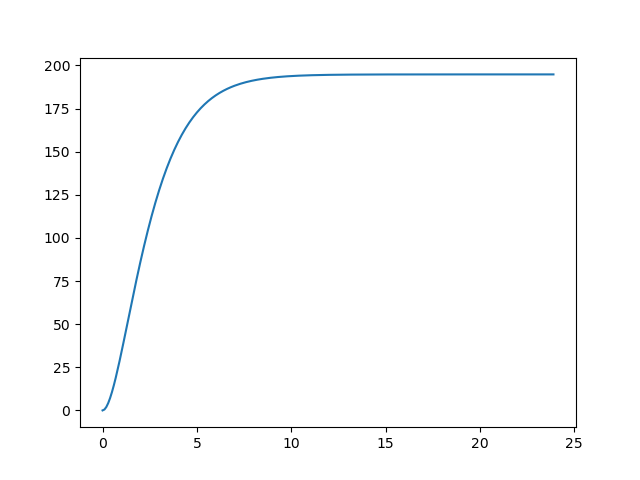

In [55]:
# try to find good initial guesses
plt.plot(t, secondOrderResponse(t, max(s), 0.7, 0.8))

In [56]:
popt, pcov = curve_fit(impulseResponse, t, s, p0=[max(s), 1.5])
popt

array([193.8471643 ,   1.35896436])

In [57]:
popt, pcov = curve_fit(secondOrderResponse, t, s, p0=[max(s), 0.7, 0.8])
popt

array([193.59725358,   0.79882199,  10.07962513])

In [58]:
# tau_1
1/popt[1]

1.2518433504207422

In [59]:
# tau_2
1/popt[2]

0.09921003875782708

<IPython.core.display.Javascript object>


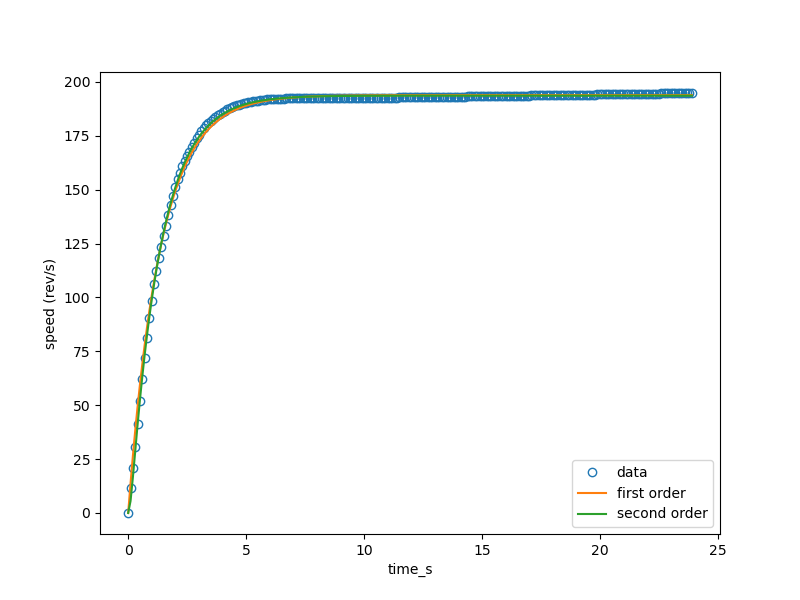

In [60]:
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
plt.plot(t, s, marker='o', fillstyle='none', linestyle='none', label='data')
popt, pcov = curve_fit(impulseResponse, t, s, p0=[max(s), 1.5])
plt.plot(t, impulseResponse(t, *popt), label='first order')

popt, pcov = curve_fit(secondOrderResponse, t, s, p0=[max(s), 0.7, 0.8])
plt.plot(t, secondOrderResponse(t, *popt), label='second order')
plt.xlabel('time_s')
plt.ylabel('speed (rev/s)')
plt.legend()

In [61]:
impulses = [0.08, .1, .12, .14, .16, .18, .2, .22, .25]

time_arrays = []
speed_arrays = []
for impulse in impulses:
    time_s, speed = impulseMeasurement(30, 0.1, impulse)
    
    time_arrays.append(time_s)
    speed_arrays.append(speed)
    
    # let the motor spin back down
    while True:
        sleep(1.0)
        currentSpeed = float(serialQry(ser, 'MFRQ? SHAFT'))
        if(currentSpeed < 1):
            break
    

In [62]:
len(speed_arrays)

9

In [63]:
# Save results to individual text files
# Change folder name to avoid overwriting old results
file_dir = '.\CalData\Impulse Response'

if not os.path.exists(file_dir):
    os.makedirs(file_dir)

for i, result in enumerate(speed_arrays):
    
    filename = f'impulseResponse_IQ={impulses[i]}.csv'
    np.savetxt(os.path.join(file_dir, filename), np.transpose([time_arrays[i], result]), 
               newline='\n', delimiter=',', header='time (s), speed (rev/s)')

In [64]:
# then read them back in
search_path = os.path.join(file_dir, 'impulseResponse*.csv')
files = glob(search_path)

time_arrays = []
speed_arrays = []
for full_path_name in files:
    results = np.loadtxt(full_path_name, delimiter=',', skiprows=1, usecols=(0,1))
    
    time_arrays.append(results[:,0])
    speed_arrays.append(results[:,1])

<IPython.core.display.Javascript object>


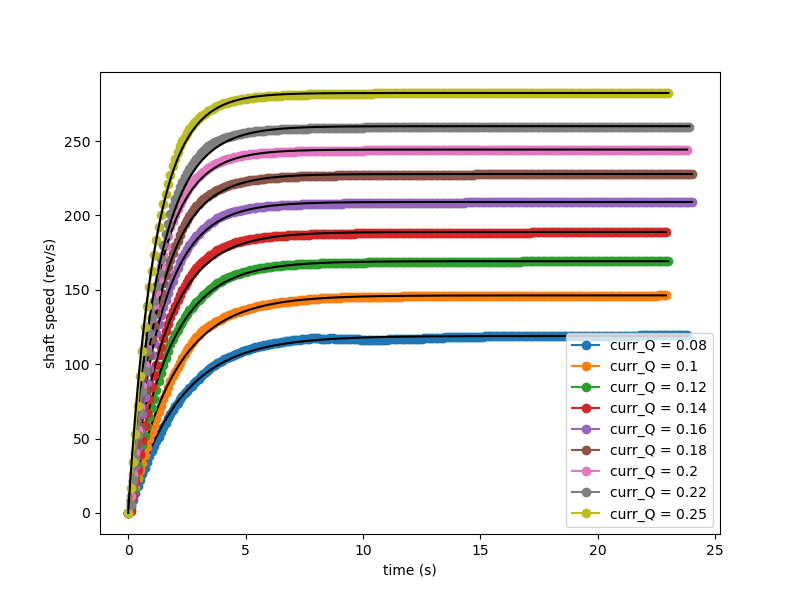

In [69]:
fit_params = []
fit_errors = []

fig = plt.figure(figsize=(8,6))

for i, result in enumerate(speed_arrays):
    # 1. Crop the arrays
    t_sub, speed_sub = cropArrays(time_arrays[i], result)
    # 2. Do the fitting and save the results
    #popt, pcov = curve_fit(secondOrderResponse, t_sub, speed_sub, p0=[max(speed_sub), 0.38, 0.73])
    popt, pcov = curve_fit(impulseResponse, t_sub, speed_sub, p0=[max(speed_sub), 1.5])
    perr = np.sqrt(np.diag(pcov))
    fit_params.append(popt)
    fit_errors.append(perr)
    # 3. Plot the results
    plt.plot(t_sub, speed_sub, marker='o', label=f'curr_Q = {impulses[i]}')
    #plt.plot(t_sub, secondOrderResponse(t_sub, *popt), color='black')
    plt.plot(t_sub, impulseResponse(t_sub, *popt), color='black')
    
plt.legend(loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('shaft speed (rev/s)')

fit_params = np.asarray(fit_params)
fit_errors = np.asarray(fit_errors)    

In [80]:
print(popt)
print(perr)

[198.55000247   0.79052488   2.83561158]
[0.03753048 0.00294483 0.03005048]


In [70]:
fit_params

array([[119.01038625,   2.12453542],
       [146.29572382,   1.898166  ],
       [169.29078861,   1.66004895],
       [188.90775119,   1.53715425],
       [209.08384441,   1.38220259],
       [227.86320621,   1.33828898],
       [244.31334573,   1.23301976],
       [260.01947596,   1.29553517],
       [282.33345719,   1.13668524]])

In [71]:
fit_errors

array([[0.09384735, 0.01044958],
       [0.12440953, 0.01050624],
       [0.10966165, 0.00756873],
       [0.20578511, 0.0122731 ],
       [0.11497334, 0.0060614 ],
       [0.16582014, 0.00790496],
       [0.16118204, 0.00687229],
       [0.24998801, 0.01026709],
       [0.14614664, 0.00509948]])

In [72]:
# For first-order firts
f_term = fit_params[:,0]
tau = fit_params[:,1]

In [83]:
# For second-order fits
f_term = fit_params[:,0]
tau_1 = 1/fit_params[:,1]
tau_2 = 1/fit_params[:,2]

<IPython.core.display.Javascript object>


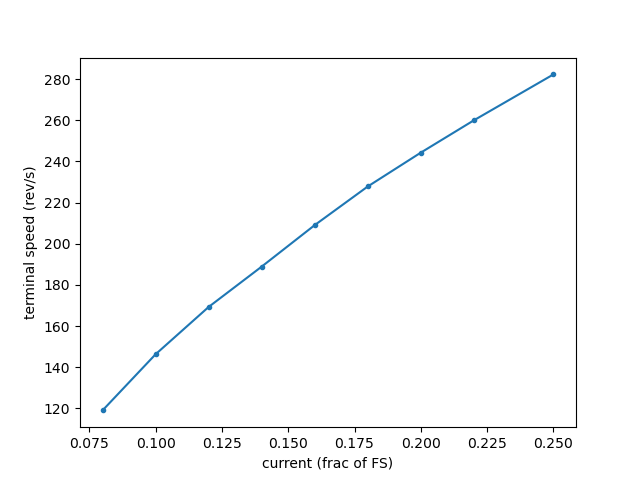

Text(0, 0.5, 'terminal speed (rev/s)')

In [73]:
plt.plot(impulses, f_term, marker='.')
plt.xlabel('current (frac of FS)')
plt.ylabel('terminal speed (rev/s)')

In [74]:
def current_v_freq(x, I_0, K, power):
    return I_0 + (x**power)*K

<IPython.core.display.Javascript object>


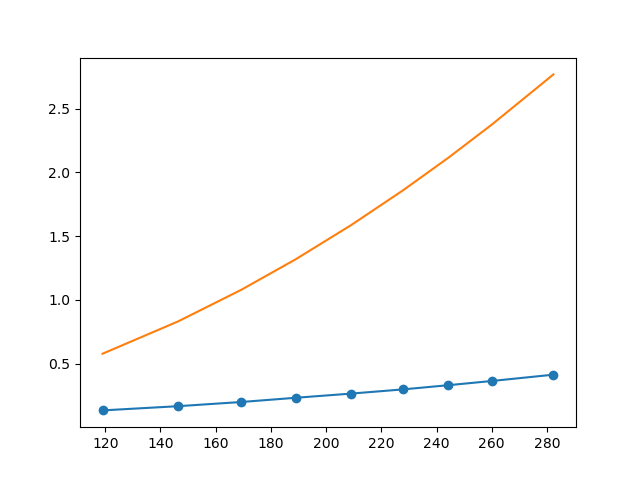

In [75]:
# TODO: fix calibration to convert impulse (FS frac) to impulse (A)
currQ = np.array(impulses)*1.65
plt.plot(f_term, currQ, marker='o')
plt.plot(f_term, current_v_freq(f_term, .05, 60e-6, 1.9))

In [76]:
popt, pcov = curve_fit(current_v_freq, f_term, currQ, p0 = np.asarray([.05, 60e-6, 1.9]))
popt

array([5.71983938e-02, 1.35390186e-05, 1.80286089e+00])

<IPython.core.display.Javascript object>


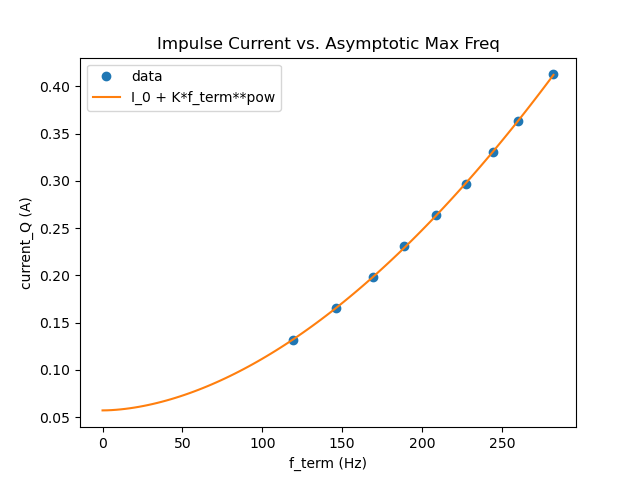

In [80]:
x = np.linspace(0, max(f_term), 100)
plt.plot(f_term, currQ, 'o', label='data')
plt.plot(x, current_v_freq(x, *popt), label='I_0 + K*f_term**pow')
plt.xlabel('f_term (Hz)')
plt.ylabel('current_Q (A)')
plt.title('Impulse Current vs. Asymptotic Max Freq')
plt.legend()

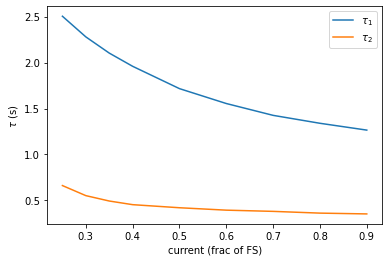

In [86]:
plt.plot(impulses[:-1], tau_1, label=r'$\tau_1$')
plt.plot(impulses[:-1], tau_2, label=r'$\tau_2$')
plt.xlabel('current (frac of FS)')
plt.ylabel(r'$\tau$ (s)')
plt.legend()

In [81]:
def linearFit(x, m, b):
    return m*x + b

In [82]:
popt, pcov = curve_fit(linearFit, impulses, f_term/tau)
popt

array([1113.74295752,  -32.02236152])

<IPython.core.display.Javascript object>


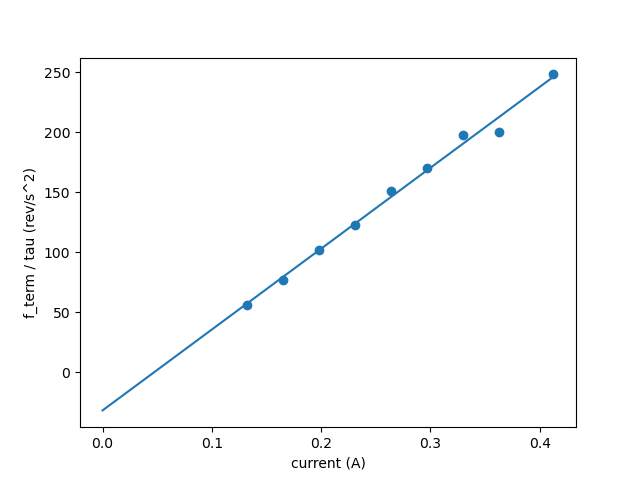

y-intercept = -32.022
slope = 674.996
J = 1.31e-06 kg*m^2


In [90]:
currQ = np.array(impulses)*1.65 #Amps at full-scale
y1 = f_term/tau

p1 = plt.plot(currQ, y1, marker='o', linestyle='none')

popt, pcov = curve_fit(linearFit, currQ, y1)
# Or constrain the y-intercept to be zero
# popt, pcov = curve_fit(linearFit, currQ, y1, bounds=([-np.inf, 0], [np.inf, 0.001]))

x = np.linspace(0, max(currQ), 100)
plt.plot(x, linearFit(x, *popt), color=p1[0].get_color())
plt.xlabel('current (A)')
plt.ylabel('f_term / tau (rev/s^2)')

m = popt[0]
b = popt[1]
print(f'y-intercept = {b:.3f}')
print(f'slope = {m:.3f}')
K_T = 5.55e-3 #N*m/A, from Nuelectronics spec sheet
J = K_T/(2*np.pi*m)
print(f'J = {J:.3g} kg*m^2')

intercept = 20.372
slope = 377.794
J = 2.34e-06 kg*m^2


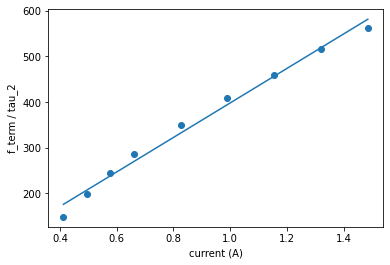

In [90]:
y2 = f_term/tau_2
p2 = plt.plot(currQ, y2, marker='o', linestyle='none')
popt, pcov = curve_fit(linearFit, currQ, y2)
plt.plot(currQ, linearFit(currQ, *popt), color=p2[0].get_color())

plt.xlabel('current (A)')
plt.ylabel('f_term / tau_2')

m = popt[0]
b = popt[1]
print(f'intercept = {b:.3f}')
print(f'slope = {m:.3f}')
K_T = 5.55e-3 #N*m/A, from Nuelectronics spec sheet
J = K_T/(2*np.pi*m)
print(f'J = {J:.3g} kg*m^2')